# Machine Learning Project 2 (Regression)
### Fraudulent Firm Classification

Aarya Aarya (axx160530)

Nishant Mathew (nxm180000)

## Introduction

Financial fraud is a serious white-collar crime which is a burning issue these days. It causes serious economic disturbances and so comes with heavy punishment and fines, but the details of the misdeeds can be stranger than fiction.

Recently, numerous charges of fraud — and alleged fraud — have made headlines. Financial fraud isn't new, and the extent of the crime can vary significantly. In some cases, billions of dollars are lost and companies end up bankrupt. Most cases have at least one person, but often a group of fraudsters, going to prison.

Some cases involve forged documents, while others focus on trying to sell an item somebody doesn't own. Ponzi schemes are also common. Even bitcoin has been the source of fraud.

### Aim:
So, the aim of this project is to assist auditors by building a classification model that can assist in predicting a fraudulent firm on the basis of present and historical risk factors.

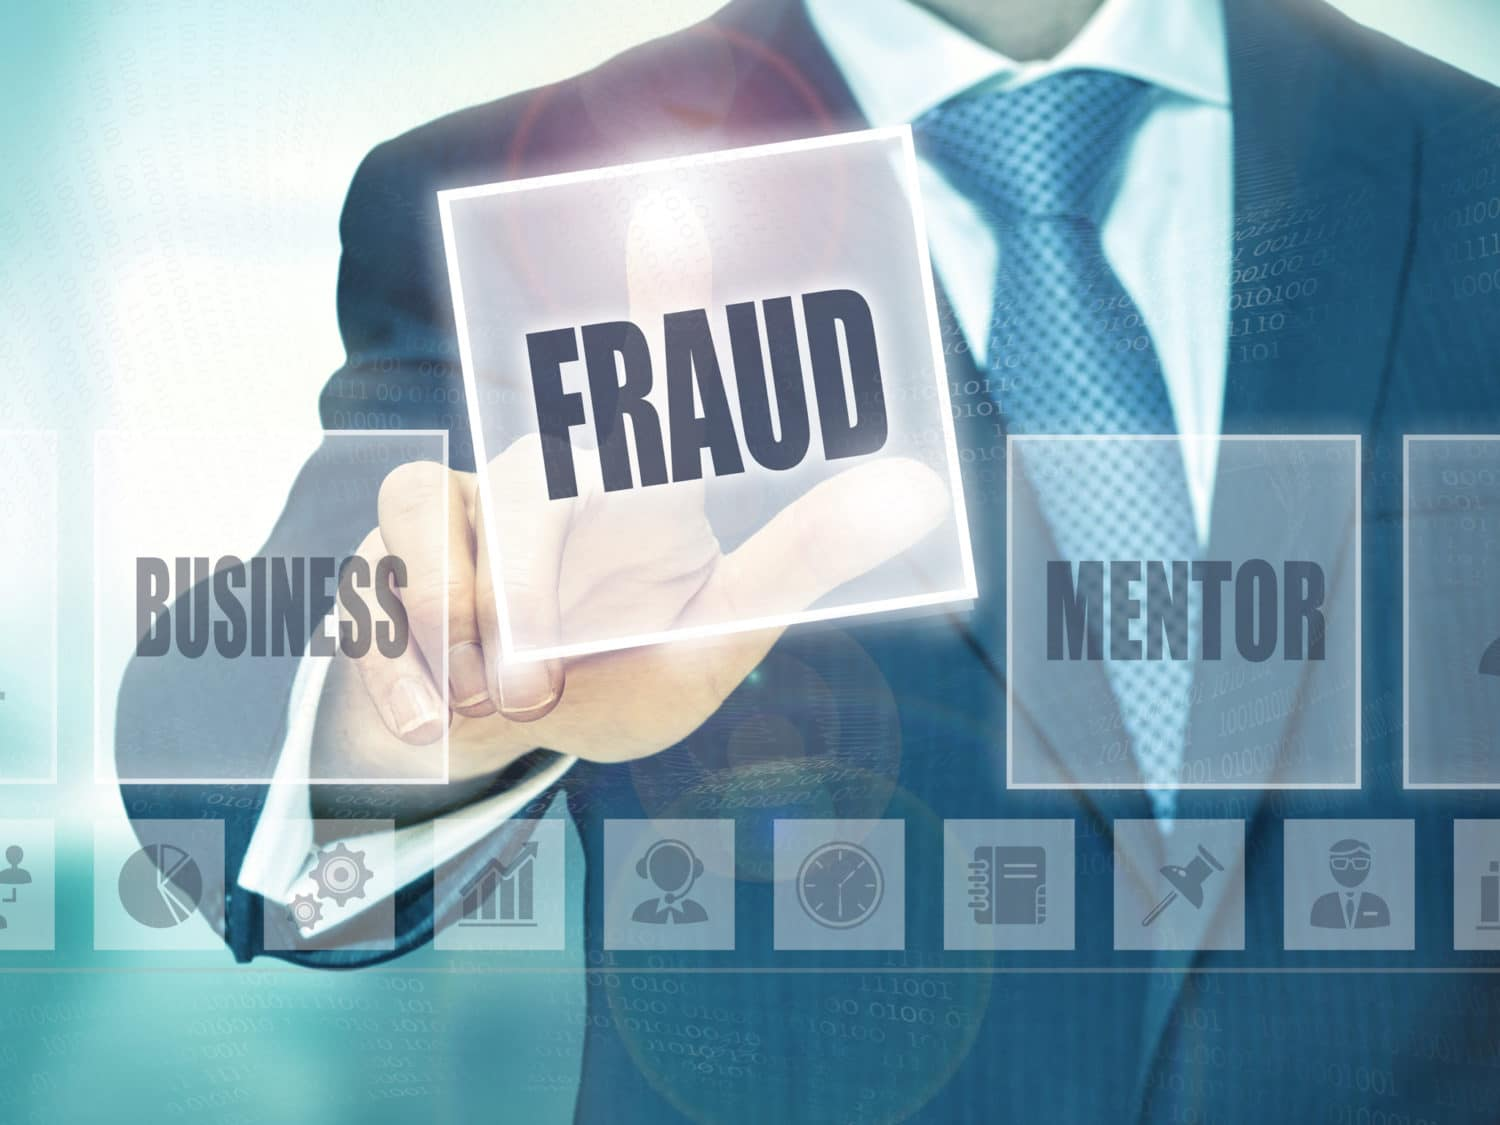

### Auditing
Auditing is the process of examining an organization's (or individual's) financial records to determine if they are accurate and in accordance with any applicable rules (including accepted accounting standards), regulations, and laws.Fraud auditing has been defined in courses conducted by the Association of Certified

Fraud auditing has been defined in courses conducted by the Association of Certified Fraud Examiners as: A proactive approach to detect financial frauds using accounting records and information, analytical relationships, and an awareness of fraud perpetration and concealment schemes.

##### So, here for fraud detection, Audit risk factor can be considered as a good indicator while determining if the firm is fraud or not.

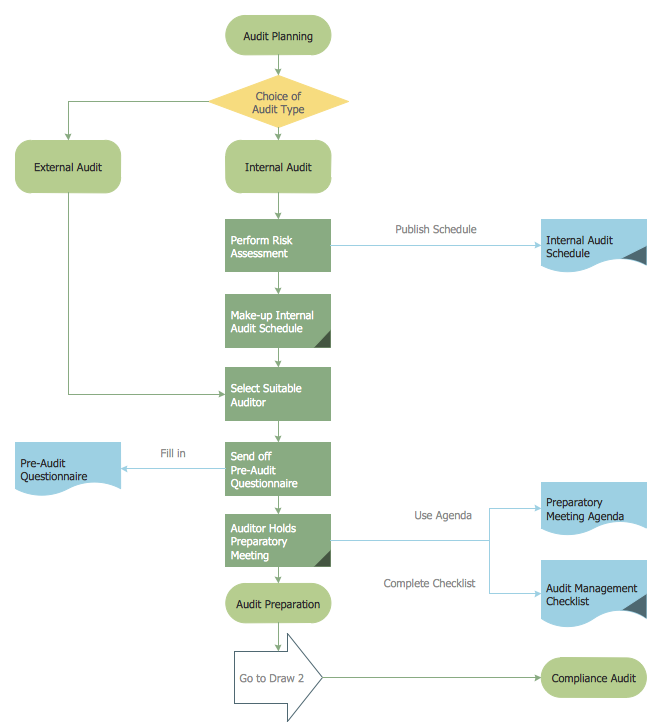

Source:https://www.conceptdraw.com/examples/financial-audit-process-flowchart

## Data

The data has been taken from Comptroller and Auditor General (CAG) of India for year 2015 - 2016.
It is an authority that audits receipts and expenditureof all the firms that are financed by the government of India.

The files has data for 777 firms from 46 different cities of a state that are listed by the auditors for targeting the next field-audit work. The targetoffices are listed from 14 different sectors.

Apart from the Audit Risk Score, there are various other risk assessment scores as features in the dataset like Total risk score using analytical procedure, Discrepancy found in the planned expenditure of inspection and summary report in Rs (in crore), Sector score, Historical risk score value, Loss Amount of loss suffered by the firm last year, etc.

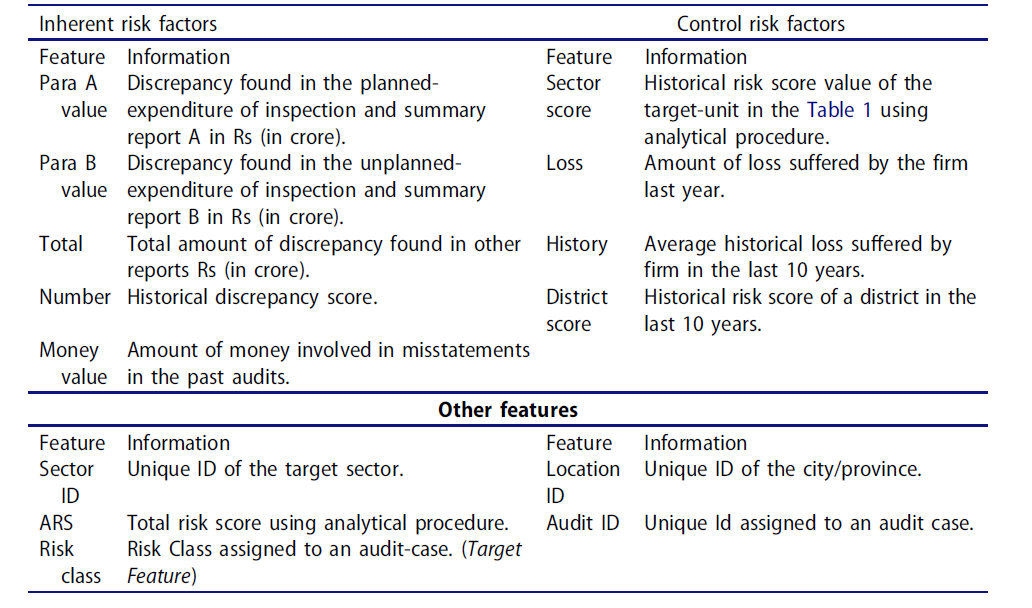


###### SOURCE: https://www.researchgate.net/publication/323655455_Fraudulent_Firm_Classification_A_Case_Study_of_an_External_Audit

### Machine Learning comes to rescue

Machine learning has been instrumental in solving some of the important business problems such as detecting email spam, focused product recommendation, accurate medical diagnosis etc. The adoption of machine learning (ML) has been accelerated with increasing processing power, availability of big data and advancements in statistical modeling. 

##### So, lets start with Fraudulent Firm Classification dataset and see how far we can detect the Fraud Firms with our Machine Learning models.


In [31]:
### Importing Required Libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn import neighbors
from sklearn.svm import SVR

from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

#### I shall supress warnings so that the code is more readable

In [32]:
import warnings
warnings.filterwarnings("ignore")

Reading the file contents in dataframes

### Attributes:
Risk factors from various areas such past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc are examined. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.

In [33]:
audit_risk_df = pd.read_csv('./audit_risk.csv')
trial_df = pd.read_csv('./trial.csv')


In [34]:
#Keeping only the extra columns present in the trial file
trial_df = trial_df [['Marks','MONEY_Marks','Loss','LOSS_SCORE','History_score','Risk']]
#Renaming Risk column since a feature with same name is present in audit file
trial_df = trial_df.rename(columns={"Risk": "Risk_trial"})

Since the number of rows are same in both the files and joining on common features doesnt make sense we are concatenating both the data frames side by side.

#### There are many features in the dataset like Score_A, Score_B, etc.. which are repetetive and their values are also the same if we bring them to same scale. Since all the repetitive features have same values, we are keeping only 1 copy. Only "Risk" has different value in both files. 

In [35]:
result = pd.concat([audit_risk_df.reset_index(drop=True),trial_df.reset_index(drop=True)], axis=1)

In [36]:
result.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks', 'Loss',
       'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

### We are making three models for the following dependent variables:
1. Regression models for Audit_Risk
2. Classification models for Risk(from audit file)
3. Classification models for Risk(from trial file)

In [37]:
#All three dependent variables
trial_risk_df = result['Risk_trial'].copy()
risk_df = result['Risk'].copy()
audit_risk_df = result['Audit_Risk'].copy()

In [38]:
#Independent variables - Dropping the Dependent Variables
features_df = result.drop(columns = ['Risk','Risk_trial','Audit_Risk'])

In [39]:
print (features_df[pd.to_numeric(features_df['LOCATION_ID'], errors='coerce').isnull()])

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
351          1.99      LOHARU    0.30      0.2   0.060     0.0      0.2   
355          1.99         NUH    0.55      0.2   0.110     0.0      0.2   
367          1.99     SAFIDON    0.48      0.2   0.096     0.0      0.2   

     Risk_B  TOTAL  numbers  ...  Risk_F  Score  Inherent_Risk  CONTROL_RISK  \
351     0.0   0.30      5.0  ...     0.0    2.0          1.460           0.4   
355     0.0   0.55      5.0  ...     0.0    2.0          1.644           0.4   
367     0.0   0.48      5.0  ...     0.0    2.0          1.590           0.4   

     Detection_Risk  Marks  MONEY_Marks  Loss  LOSS_SCORE  History_score  
351             0.5      2            2     0           2              2  
355             0.5      2            2     0           2              2  
367             0.5      2            2     0           2              2  

[3 rows x 30 columns]


The feature LOCATION_ID has 3 non_numeric values 

In [40]:
features_df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

We will now replace the non-numeric values with unique numeric values

In [41]:
features_df.replace('LOHARU', '10', inplace = True)
features_df.replace('NUH', '26', inplace = True)
features_df.replace('SAFIDON', '45', inplace = True)
features_df['LOCATION_ID'] = features_df['LOCATION_ID'].astype(int)
features_df['LOCATION_ID'].unique()

array([23,  6,  7,  8, 13, 37, 24,  3,  4, 14,  5, 20, 19, 21, 22,  9, 11,
       12, 29, 30, 38, 31,  2, 32, 16, 33, 15, 36, 34, 18, 25, 39, 27, 35,
       40, 41, 42,  1, 28, 10, 26, 45, 43, 44, 17], dtype=int64)

We remove Location_ID from the feature set, since it is a nominal variable which will require 1 hot encoding, resulting in 45 additional features. 

In [42]:
features_df = features_df.drop(columns = ['LOCATION_ID'])

## Regression for the column Audit Risk

### Train/Test Split

In [43]:
y = audit_risk_df
X_train, X_test, y_train, y_test = train_test_split(features_df, y, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(582, 29) (582,)
(194, 29) (194,)


### Handling Missing Values

In [44]:
X_train.columns[X_train.isna().any()].tolist()

['Money_Value']

We see that Money Value has missing values

In [45]:
missing_value_indices = X_train[X_train["Money_Value"].isnull()].index.values
len(missing_value_indices)

1

### We have only 1 row which has a missing value. Putting the mean of the money value column in this row.

In [46]:
mean_X = X_train['Money_Value'].mean()
X_train
for ind in missing_value_indices:
    X_train.loc[ind,'Money_Value'] = mean_X
    

#No missing values in X_test
X_test.columns[X_test.isna().any()].tolist()

[]

In [47]:
X_train.shape

(582, 29)

## Feature Selection
### Analyzing the correlation heatmap to drop highly correlated columns

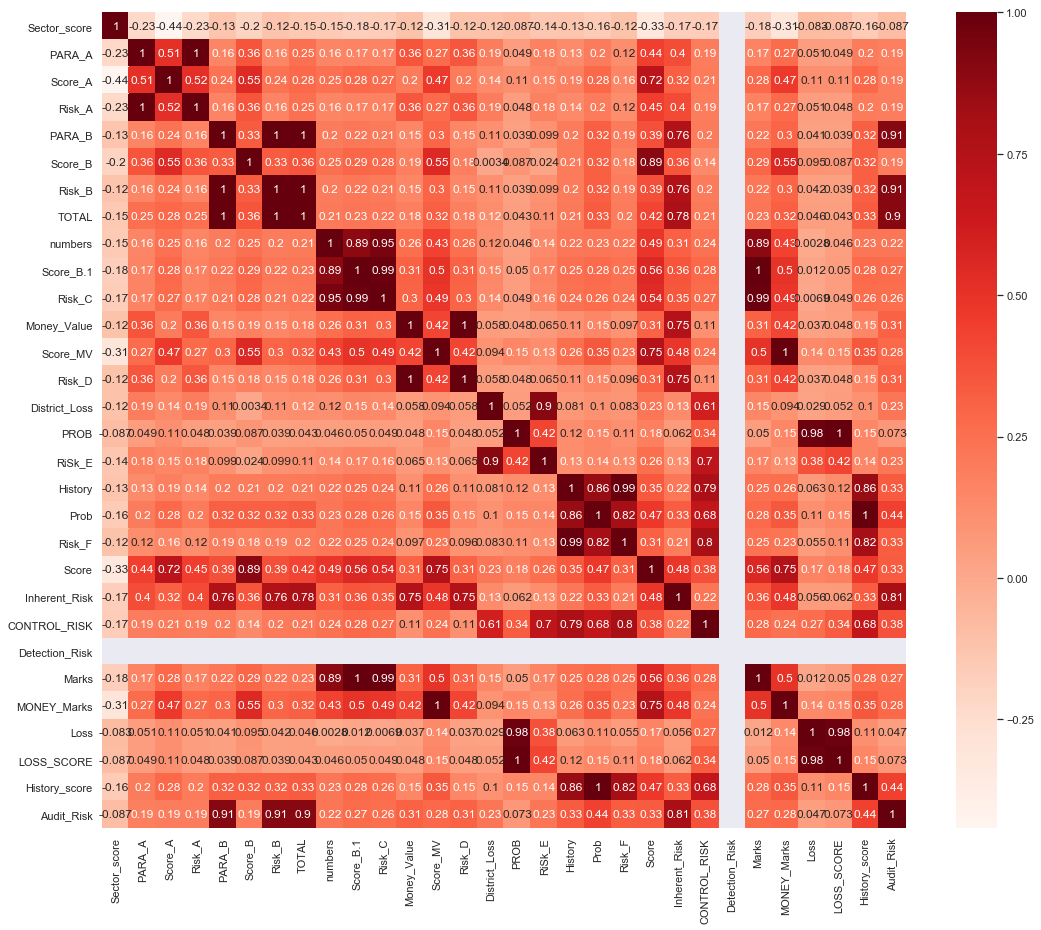

In [48]:
#Using Pearson Correlation
plt.figure(figsize=(18,15))
combined_train_df = pd.concat([X_train,y_train],axis=1)
cor = combined_train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Findings:
1. Correlation between PARA_A and Risk_A is 1
2. Correlation between PARA_B and Risk_B is 1
3. Correlation between PARA_B and Total is 1
4. Correlation between Marks and Score_B.1 is 1
5. Correlation between Risk_D and Money_Value is 1
6. Correlation between MONEY_Marks and Score_MV is 1
7. Correlation between PROB and LOSS_Score is 1
8. Correlation between Prob and History_score is 1
9. Correlation between Risk_F and History is 0.99
10. Correlation between Loss and LOSS_Score is 0.98

Therefore, we are dropping the columns

Risk_A, Risk_B, Total, Score_B.1, Risk_D, Score_MV, PROB, Prob, Risk_F, Loss

In [49]:
X_train_org = X_train
X_test_org = X_test

X_train = X_train.drop(columns = ['Risk_A', 'Risk_B', 'TOTAL', 'Score_B.1', 'Risk_D', 'Score_MV', 'PROB', 'Prob','Risk_F', 'Loss'])
X_test = X_test.drop(columns = ['Risk_A', 'Risk_B', 'TOTAL', 'Score_B.1', 'Risk_D', 'Score_MV', 'PROB', 'Prob','Risk_F', 'Loss'])

In [50]:
#Remaining Columns
X_train.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Risk_C', 'Money_Value', 'District_Loss', 'RiSk_E', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Marks',
       'MONEY_Marks', 'LOSS_SCORE', 'History_score'],
      dtype='object')

In [51]:
X_train.shape

(582, 19)

## Data Scaling

#### Since all the columns are nearly in the same scale we can standardize the data so that our data follows a standard normal distribution, which provides better results once they go through the ML algorithms

In [52]:
scaler = preprocessing.StandardScaler().fit(X_train)
#Means of All columns
print(scaler.mean_)
#StdDev of all columns
print(scaler.scale_)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

org_scaler = preprocessing.StandardScaler().fit(X_train_org)
X_train_org = org_scaler.transform(X_train_org)
X_test_org = org_scaler.transform(X_test_org)


[20.15664948  2.55395292  0.35738832 11.75845223  0.31580756  5.07044674
  1.15790378 12.43455077  2.49828179  0.52027491  0.12886598  2.72233677
 17.33630027  0.58762887  0.5         2.24398625  2.91408935  2.07216495
  2.20274914]
[24.32834344  5.6586216   0.17499745 56.55088638  0.17108191  0.27686166
  0.54762631 53.71605128  1.21523708  0.29210916  0.60259327  0.86601511
 51.8078406   0.48338534  1.          0.81370768  1.60845301  0.4081832
  0.75536523]


In [53]:
sns.set(rc={'figure.figsize':(20,12)})

## Bagging

### Bagging using Support Vector Regressor

Text(0, 0.5, 'Scores')

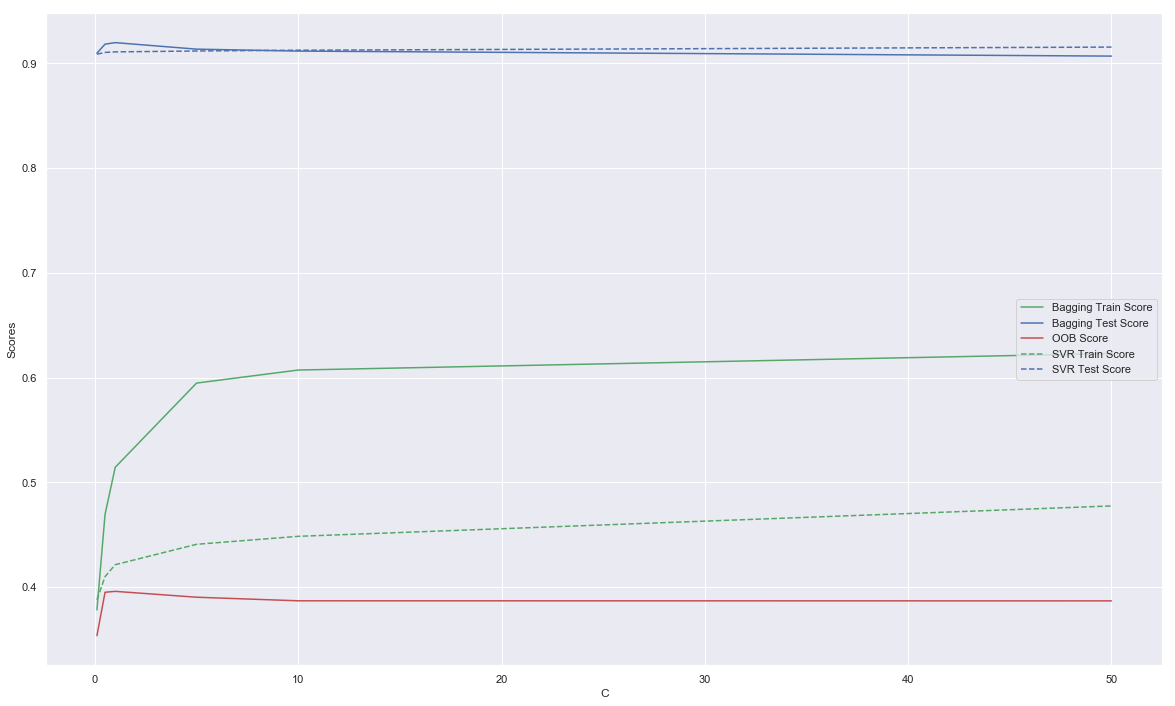

In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

train_score_array = []
test_score_array = []
org_train_score_array = []
org_test_score_array = []
oob_score_array=[]

for i in [0.1, 0.5, 1, 5, 10, 50]:
    svm_reg = SVR(kernel='linear', C=i)
    svm_reg.fit(X_train, y_train)
    org_train_score_array.append(svm_reg.score(X_train, y_train))
    org_test_score_array.append(svm_reg.score(X_test, y_test))
    bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=100, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
    bag_reg_svm.fit(X_train, y_train)
    train_score_array.append(bag_reg_svm.score(X_train, y_train))
    test_score_array.append(bag_reg_svm.score(X_test, y_test))
    oob_score_array.append(bag_reg_svm.oob_score_)
    
x_axis = [0.1, 0.5, 1, 5, 10, 50]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Bagging Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Bagging Test Score')
plt.plot(x_axis, oob_score_array, c = 'r', label = 'OOB Score')
plt.plot(x_axis, org_train_score_array, c = 'g', label = 'SVR Train Score', linestyle = '--')
plt.plot(x_axis, org_test_score_array, c = 'b', label = 'SVR Test Score', linestyle = '--')
plt.legend(loc=5)
plt.xlabel('C')
plt.ylabel('Scores')

In [55]:
svm_reg = SVR(kernel='linear', C=10)
svm_reg.fit(X_train, y_train)
y_pred=svm_reg.predict(X_test)
bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
bag_reg_svm.fit(X_train, y_train)
y_pred=bag_reg_svm.predict(X_test)

print('Train score: {:.4f}'.format(bag_reg_svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg_svm.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.5909
Test score: 0.9125
RMSE: 4.3147


### Bagging using Decision Tree Regressor

Text(0, 0.5, 'Scores')

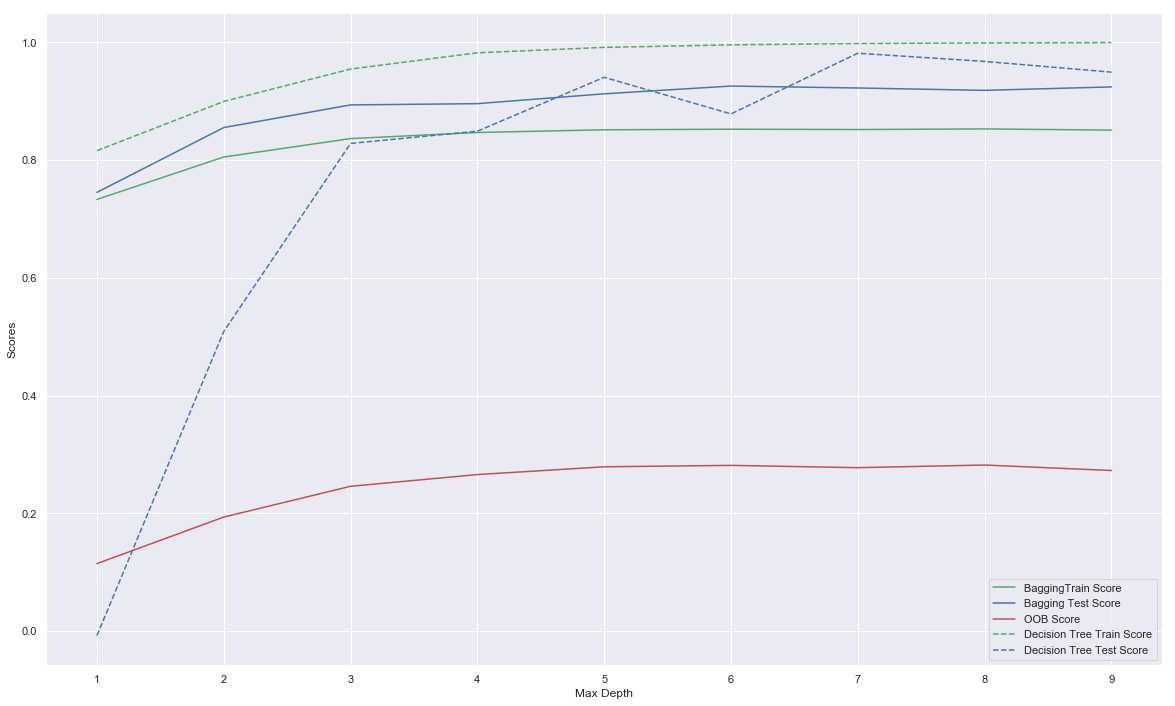

In [56]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

org_train_score_array = []
org_test_score_array = []
train_score_array = []
test_score_array = []
oob_score_array=[]

for n in range(1,10):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    dt_reg.fit(X_train, y_train)
    org_train_score_array.append(dt_reg.score(X_train, y_train))
    org_test_score_array.append(dt_reg.score(X_test, y_test))
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))
    oob_score_array.append(bag_reg_dt.oob_score_)

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'BaggingTrain Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Bagging Test Score')
plt.plot(x_axis, oob_score_array, c = 'r', label = 'OOB Score')
plt.plot(x_axis, org_train_score_array, c = 'g', label = 'Decision Tree Train Score', linestyle = '--')
plt.plot(x_axis, org_test_score_array, c = 'b', label = 'Decision Tree Test Score', linestyle = '--')
plt.legend(loc=4)
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [57]:
dt_reg = DecisionTreeRegressor(max_depth=7,random_state=0)
dt_reg.fit(X_train, y_train)

bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
bag_reg_dt.fit(X_train, y_train)

y_pred=bag_reg_dt.predict(X_test)

print('Train score: {:.4f}'.format(bag_reg_dt.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg_dt.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.8520
Test score: 0.9226
RMSE: 4.0585


### Pasting using Support Vector Regressor

Text(0, 0.5, 'Scores')

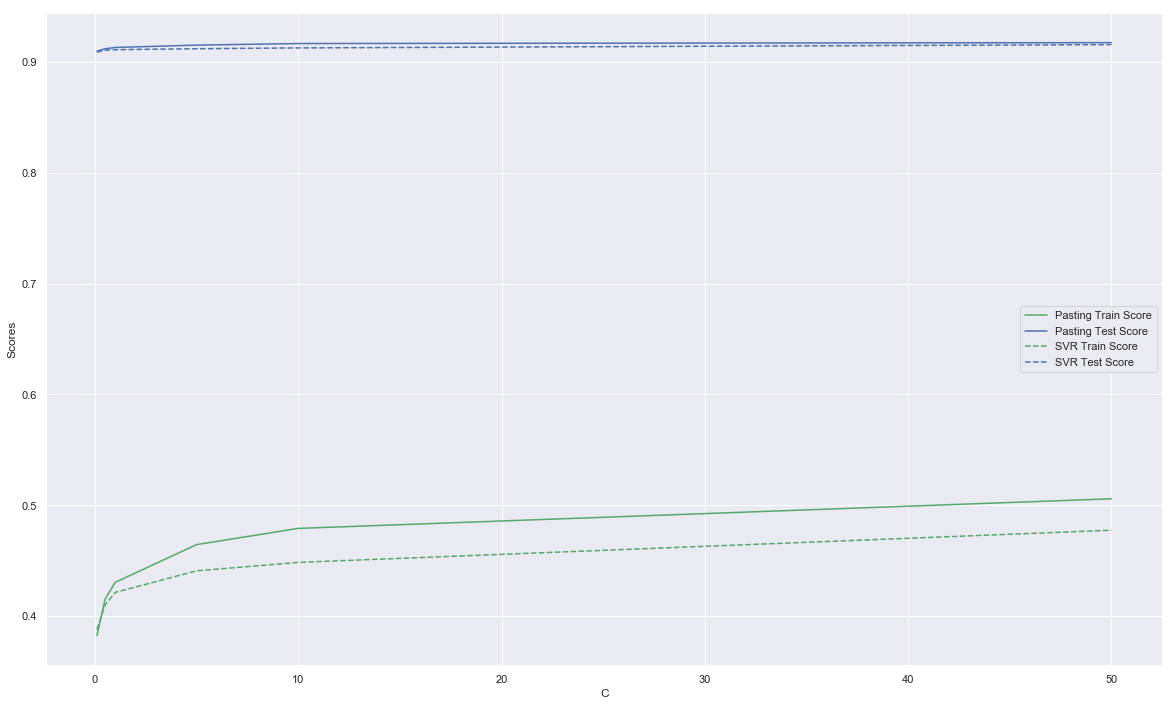

In [58]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

train_score_array = []
test_score_array = []
org_train_score_array = []
org_test_score_array = []

for i in [0.1, 0.5, 1, 5, 10, 50]:
    svm_reg = SVR(kernel='linear', C=i)
    svm_reg.fit(X_train, y_train)
    org_train_score_array.append(svm_reg.score(X_train, y_train))
    org_test_score_array.append(svm_reg.score(X_test, y_test))
    paste_reg_svm = BaggingRegressor(svm_reg, n_estimators=100, max_samples=500, bootstrap=False,random_state=0)
    paste_reg_svm.fit(X_train, y_train)
    train_score_array.append(paste_reg_svm.score(X_train, y_train))
    test_score_array.append(paste_reg_svm.score(X_test, y_test))

x_axis = [0.1, 0.5, 1, 5, 10, 50]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Pasting Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Pasting Test Score')
plt.plot(x_axis, org_train_score_array, c = 'g', label = 'SVR Train Score', linestyle = '--')
plt.plot(x_axis, org_test_score_array, c = 'b', label = 'SVR Test Score', linestyle = '--')
plt.legend(loc=5)
plt.xlabel('C')
plt.ylabel('Scores')


In [59]:
svm_reg = SVR(kernel='linear', C=50)
svm_reg.fit(X_train, y_train)
y_pred=svm_reg.predict(X_test)

paste_reg_svm = BaggingRegressor(svm_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
paste_reg_svm.fit(X_train, y_train)

y_pred=paste_reg_svm.predict(X_test)

print('Train score: {:.4f}'.format(paste_reg_svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(paste_reg_svm.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.5033
Test score: 0.9171
RMSE: 4.2006


### Pasting using Decision Tree Regressor

Text(0, 0.5, 'Scores')

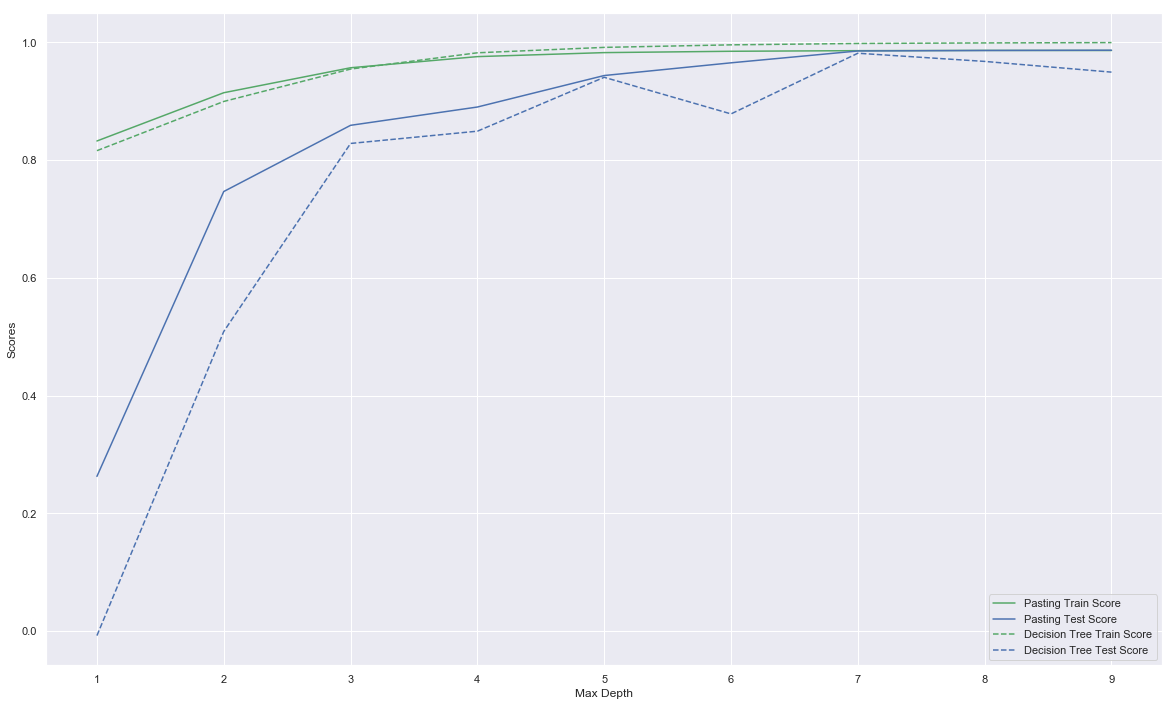

In [60]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

org_train_score_array = []
org_test_score_array = []
train_score_array = []
test_score_array = []

for n in range(1,10):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    dt_reg.fit(X_train, y_train)
    org_train_score_array.append(dt_reg.score(X_train, y_train))
    org_test_score_array.append(dt_reg.score(X_test, y_test))
    paste_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
    paste_reg_dt.fit(X_train, y_train)
    train_score_array.append(paste_reg_dt.score(X_train, y_train))
    test_score_array.append(paste_reg_dt.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Pasting Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Pasting Test Score')
plt.plot(x_axis, org_train_score_array, c = 'g', label = 'Decision Tree Train Score', linestyle = '--')
plt.plot(x_axis, org_test_score_array, c = 'b', label = 'Decision Tree Test Score', linestyle = '--')
plt.legend(loc=4)
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [61]:
dt_reg = DecisionTreeRegressor(max_depth=7,random_state=0)
dt_reg.fit(X_train, y_train)

paste_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
paste_reg_dt.fit(X_train, y_train)

y_pred=paste_reg_dt.predict(X_test)

print('Train score: {:.4f}'.format(paste_reg_dt.score(X_train, y_train)))
print('Test score: {:.4f}'.format(paste_reg_dt.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.9860
Test score: 0.9855
RMSE: 1.7581


## Adaboost

### Adaboost using KNN regressor

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score , GridSearchCV

n_estimators_val = [10, 50, 100]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)
knn = KNeighborsRegressor()
ada_reg = AdaBoostRegressor(knn, random_state=0)

adaboost_regressor = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_regressor.fit(X_train, y_train)
print ('Best Parameters: ',adaboost_regressor.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 10}


Text(0, 0.5, 'Scores')

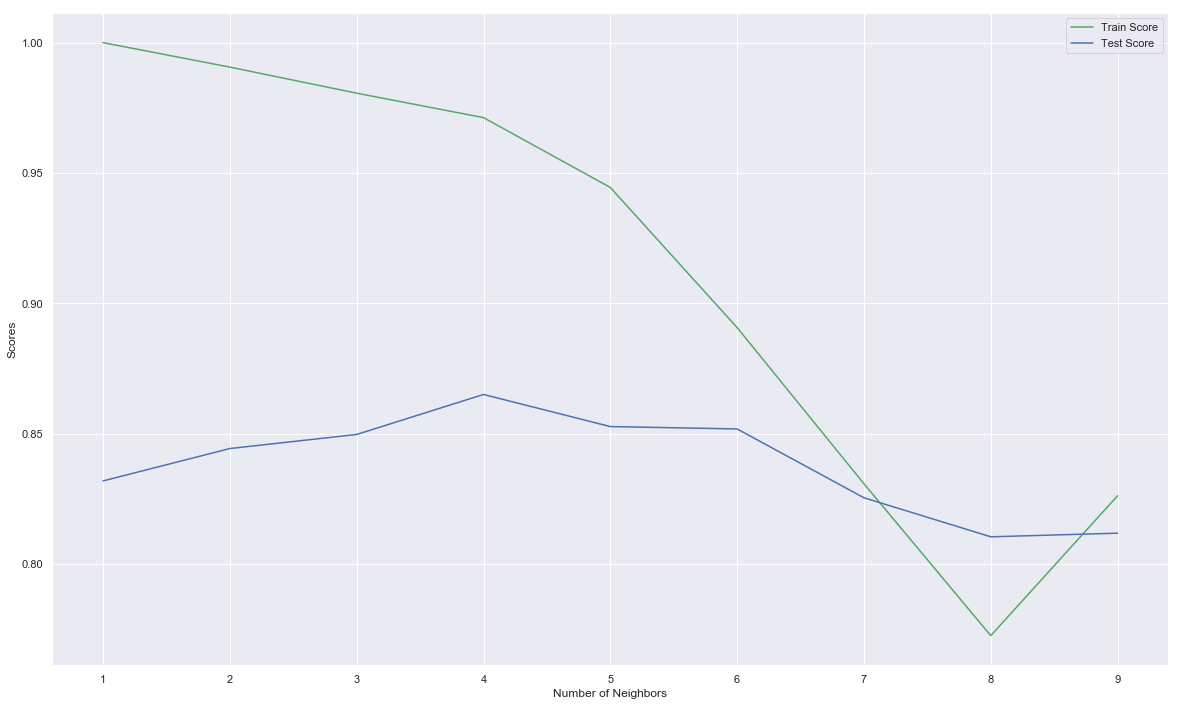

In [63]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []


for k in range(1,10):
    knn_reg=KNeighborsRegressor(n_neighbors=k)
    ada_reg_knn = AdaBoostRegressor(knn_reg, n_estimators=10,learning_rate=0.1,random_state=0)
    ada_reg_knn.fit(X_train, y_train)
    train_score_array.append(ada_reg_knn.score(X_train, y_train))
    test_score_array.append(ada_reg_knn.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Scores')

### Adaboost using Decision Tree Regressor

In [64]:
n_estimators_val = [10, 50, 100]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)
model=DecisionTreeRegressor(random_state=0)
ada_reg = AdaBoostRegressor(model, random_state=0)

adaboost_regressor = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_regressor.fit(X_train, y_train)

print ('Best Parameters: ',adaboost_regressor.best_params_)


Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 10}


Text(0, 0.5, 'Scores')

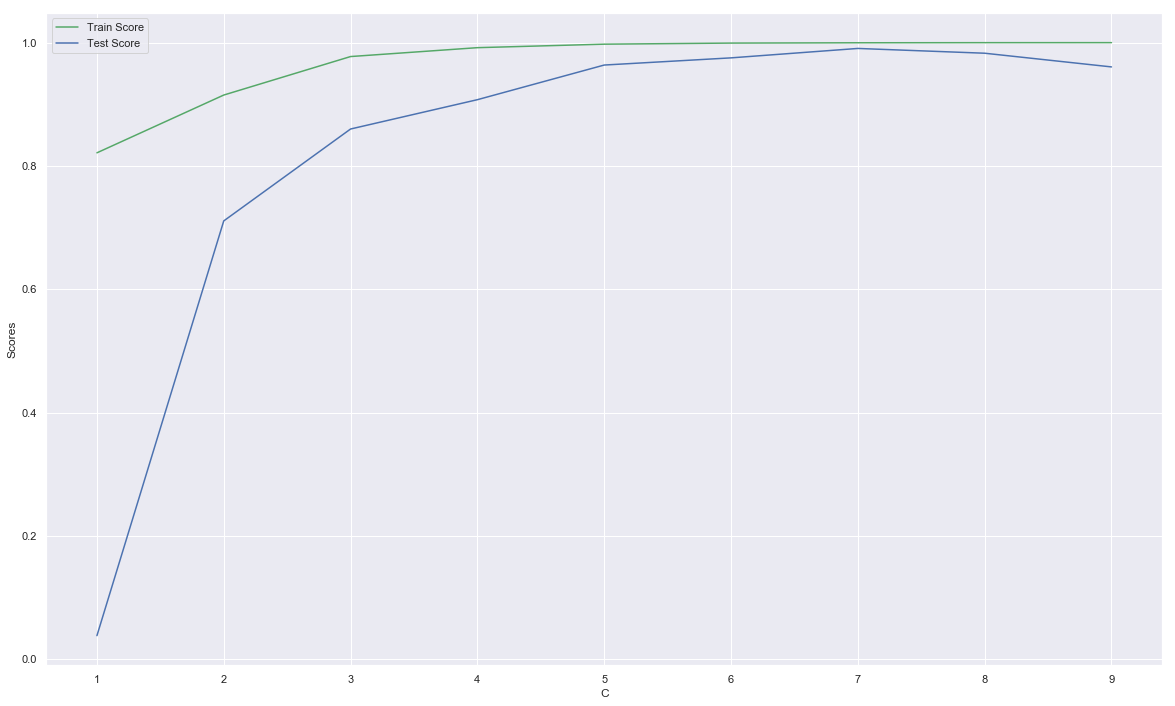

In [65]:
train_score_array = []
test_score_array = []


for n in range(1,10):
    dt_reg=DecisionTreeRegressor(max_depth=n, random_state=0)
    ada_reg_dt = AdaBoostRegressor(dt_reg, n_estimators=10,learning_rate=0.1,random_state=0)
    ada_reg_dt.fit(X_train, y_train)
    train_score_array.append(ada_reg_dt.score(X_train, y_train))
    test_score_array.append(ada_reg_dt.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('C')
plt.ylabel('Scores')

## Gradient Boosting

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Train score: 0.62
Test score: 0.53
Mean squared error: 99.86
R2 score: 0.53


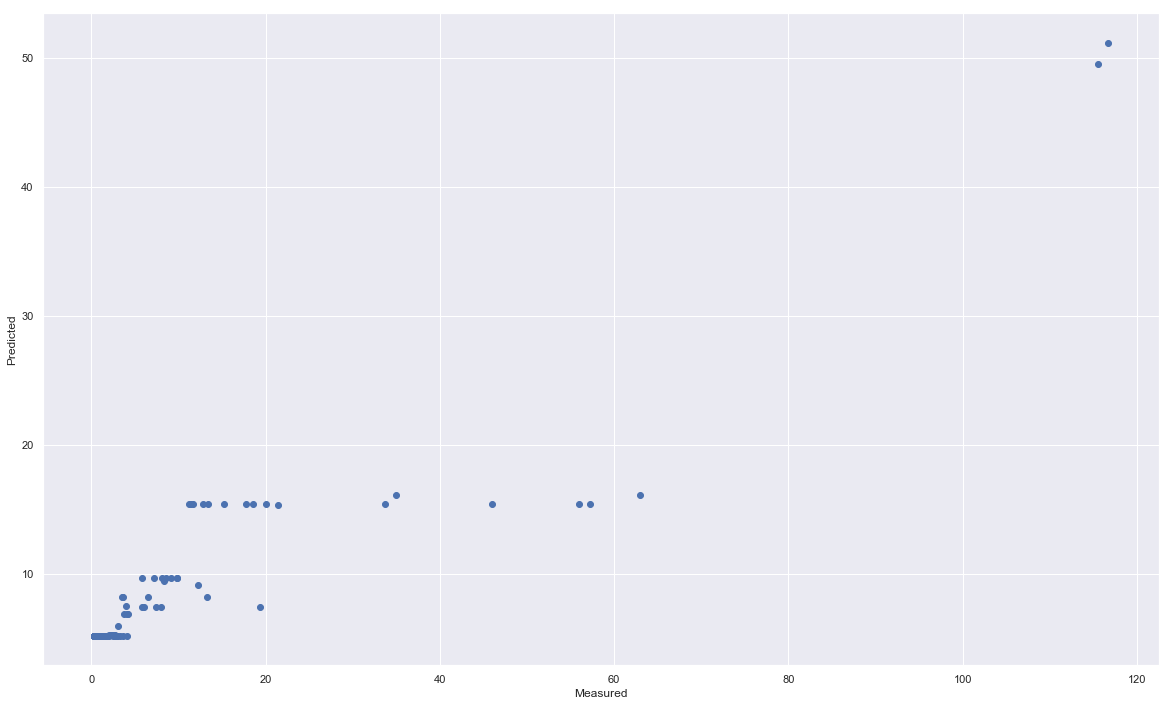

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators_val = [50, 100, 200, 500]
learning_rate_val = [0.01, 0.1, 0.5, 1]
max_depth_val = [1, 2, 3, 4]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val, max_depth=max_depth_val)
gbrg = GradientBoostingRegressor(random_state=0)

gradientboost_regressor = GridSearchCV(estimator=gbrg, param_grid=param_grid)
gradientboost_regressor.fit(X_train, y_train)

print (gradientboost_regressor.best_params_)
print('Train score: {:.2f}'.format(gradientboost_regressor.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gradientboost_regressor.score(X_test, y_test)))

y_pred = gradientboost_regressor.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

## Applying PCA

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train_org)

X_train_reduced = pca.transform(X_train_org)
X_test_reduced = pca.transform(X_test_org)

X_train_reduced.shape

(582, 10)

### Linear Regression

Train Score: 0.91
Test Score: 0.56
Mean squared error: 93.32
R2 score: 0.56


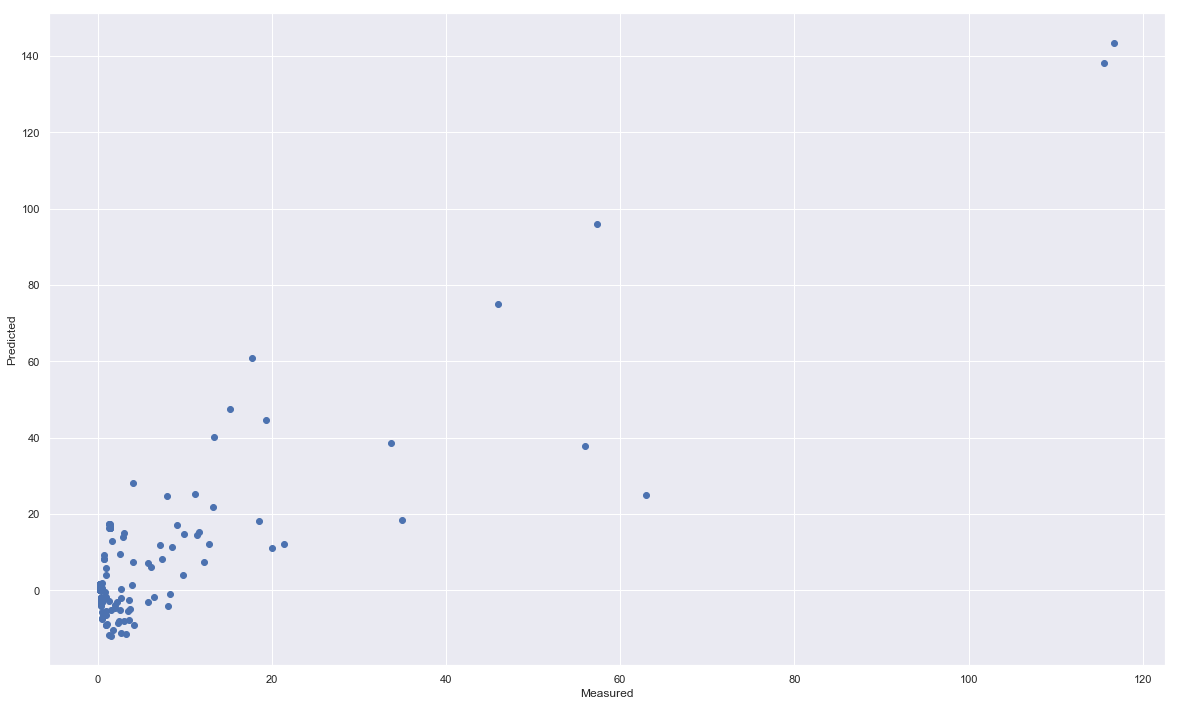

In [68]:
# Create linear regression object
lregr = linear_model.LinearRegression()

# Train the model using the training sets
lregr.fit(X_train_reduced, y_train)

# Make predictions using the testing set
y_pred = lregr.predict(X_test_reduced)

# The coefficients
#print('Coefficients: \n', lregr.coef_)

print('Train Score: %.2f'%lregr.score(X_train_reduced,y_train))
print('Test Score: %.2f'%lregr.score(X_test_reduced,y_test))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

### Ridge Regression

Best alpha value 10.0
Train Score 0.91
Test Score 0.57
Mean squared error: 91.93
R2 score: 0.5680197


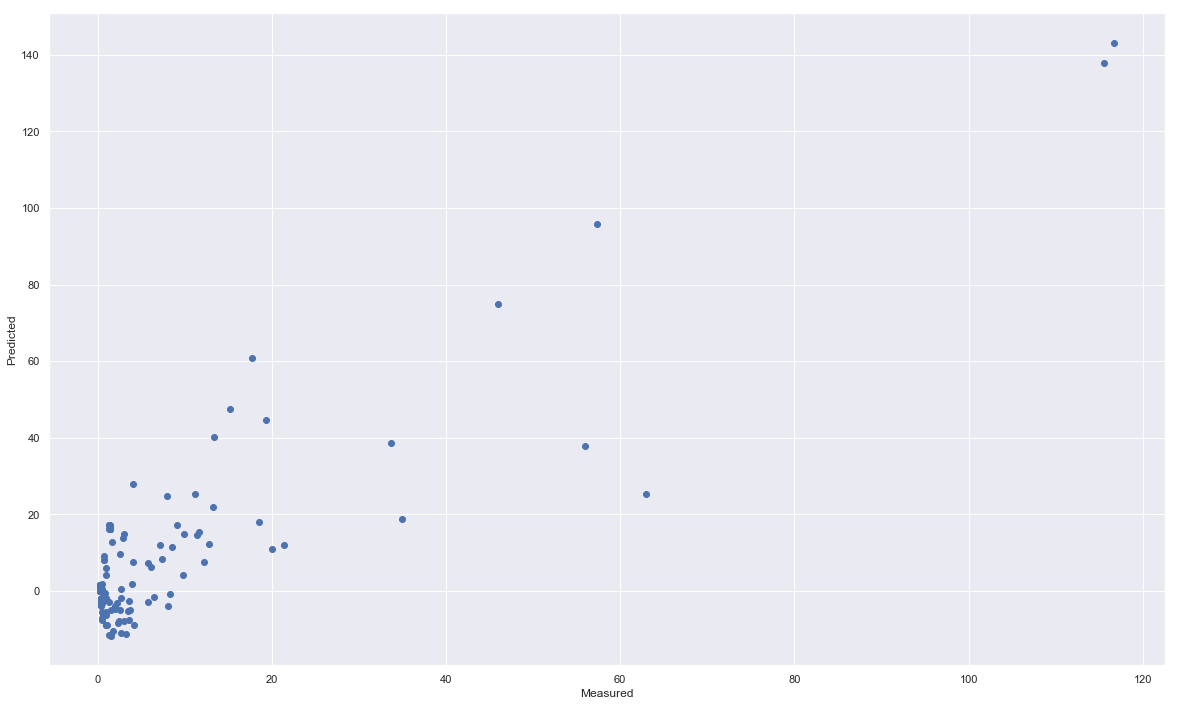

In [69]:
from  sklearn.linear_model import RidgeCV

alphas = np.array([0.01, 0.1, 1, 10])

ridge = RidgeCV(alphas=alphas,cv=5)
ridge.fit(X_train_reduced,y_train)

print('Best alpha value', ridge.alpha_)
print('Train Score %.2f' % ridge.score(X_train_reduced,y_train))
print('Test Score %.2f' % ridge.score(X_test_reduced,y_test))

# Make predictions using the testing set
y_pred = ridge.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

### Lasso Regression

Best alpha value 0.1
Train score: 0.91
Test score 0.57
Mean squared error: 92.27
R2 score: 0.57


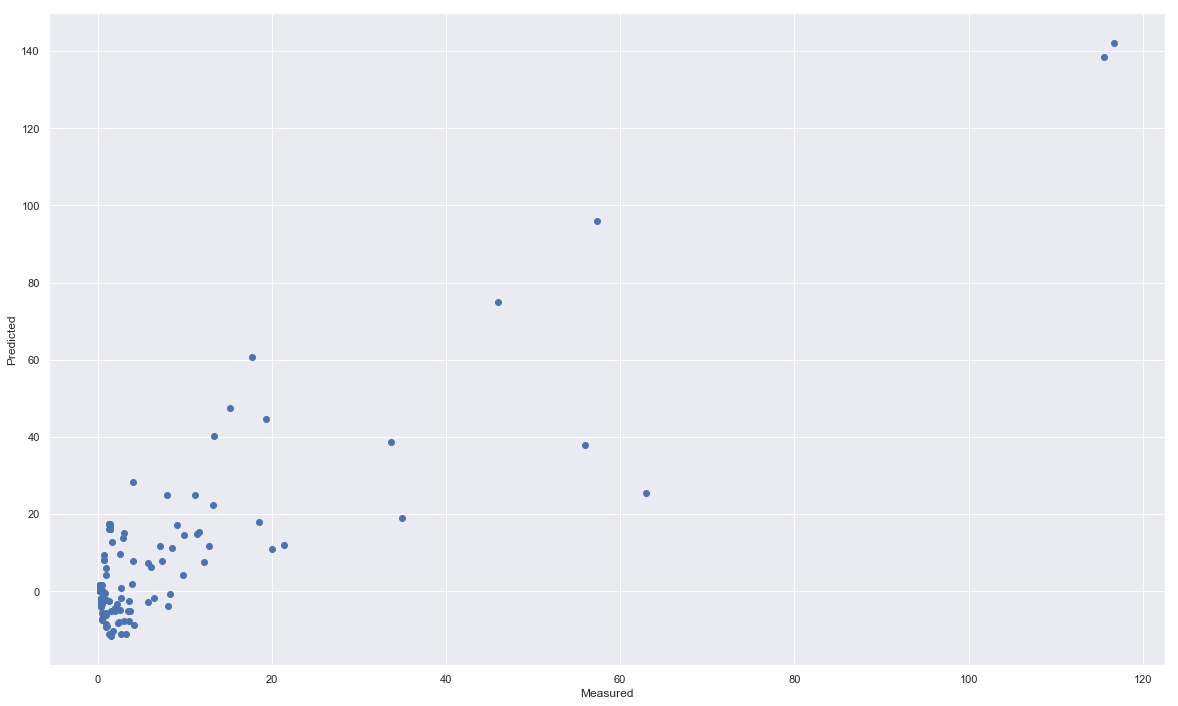

In [70]:
from  sklearn.linear_model import LassoCV

alphas = np.array([0.1, 1, 10, 100])

lasso = LassoCV(alphas=alphas,cv=5)
lasso.fit(X_train_reduced,y_train)

print('Best alpha value', lasso.alpha_)
print('Train score: %.2f' % lasso.score(X_train_reduced,y_train))
print('Test score %.2f' % lasso.score(X_test_reduced,y_test))

# Make predictions using the testing set
y_pred = lasso.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

### Polynomial Regression

[0.9123566466321976, 0.9998406050697505]
[0.5615004513226922, 0.926749966907381]


Text(0, 0.5, 'R-Squared')

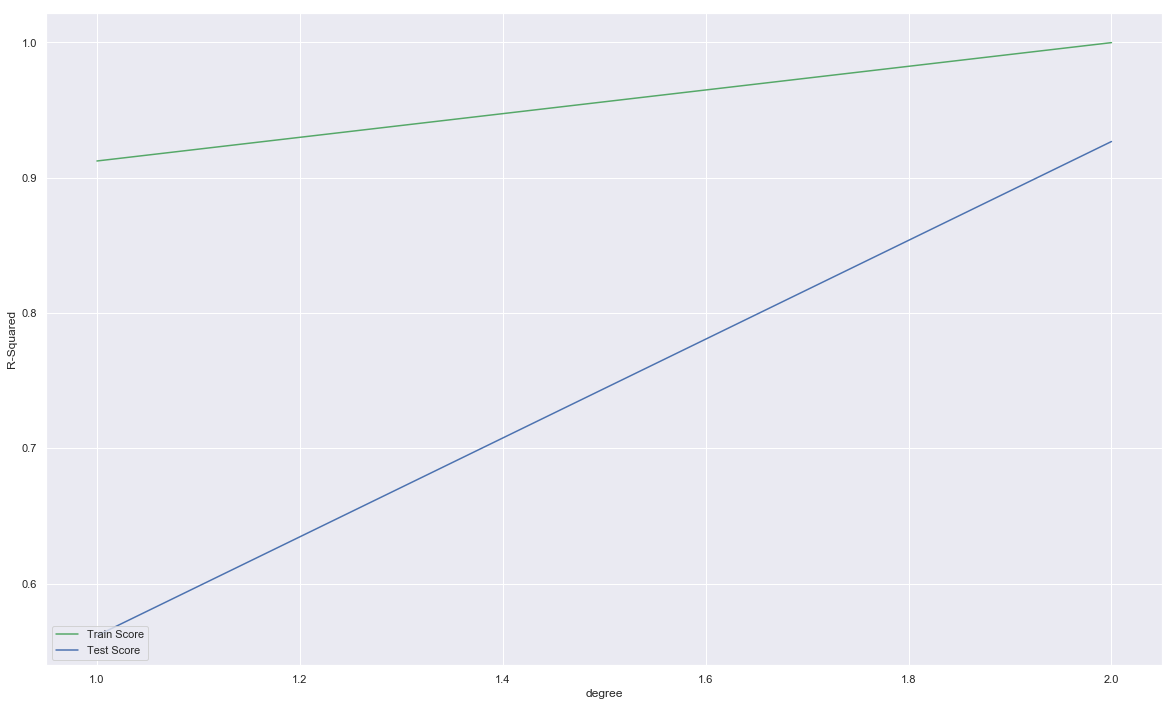

In [71]:
train_score_list = []
test_score_list = []
regr = linear_model.LinearRegression()

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    regr.fit(X_train_poly, y_train)
    train_score_list.append(regr.score(X_train_poly, y_train))
    test_score_list.append(regr.score(X_test_poly, y_test))


print(train_score_list)
print(test_score_list)

plt.plot(range(1,3), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(1,3), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel(r'degree')
plt.ylabel(r'R-Squared')

### KNN Regression

In [72]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

knn_reg = GridSearchCV(knn, params, cv=5)
knn_reg.fit(X_train_reduced,y_train)

print (knn_reg.best_params_)
print('Train score: {:.2f}'.format(knn_reg.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(knn_reg.score(X_test_reduced, y_test)))

# Make predictions using the testing set
y_pred = knn_reg.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

{'n_neighbors': 2}
Train score: 0.80
Test score: 0.87
Mean squared error: 27.81
R2 score: 0.87


### SVM Regression

Best parameters set found : {'C': 0.1, 'kernel': 'linear'}
Train score 0.3974364127690011
Test score 0.9097100831349995
Mean squared error: 19.21
R2 score: 0.9097101


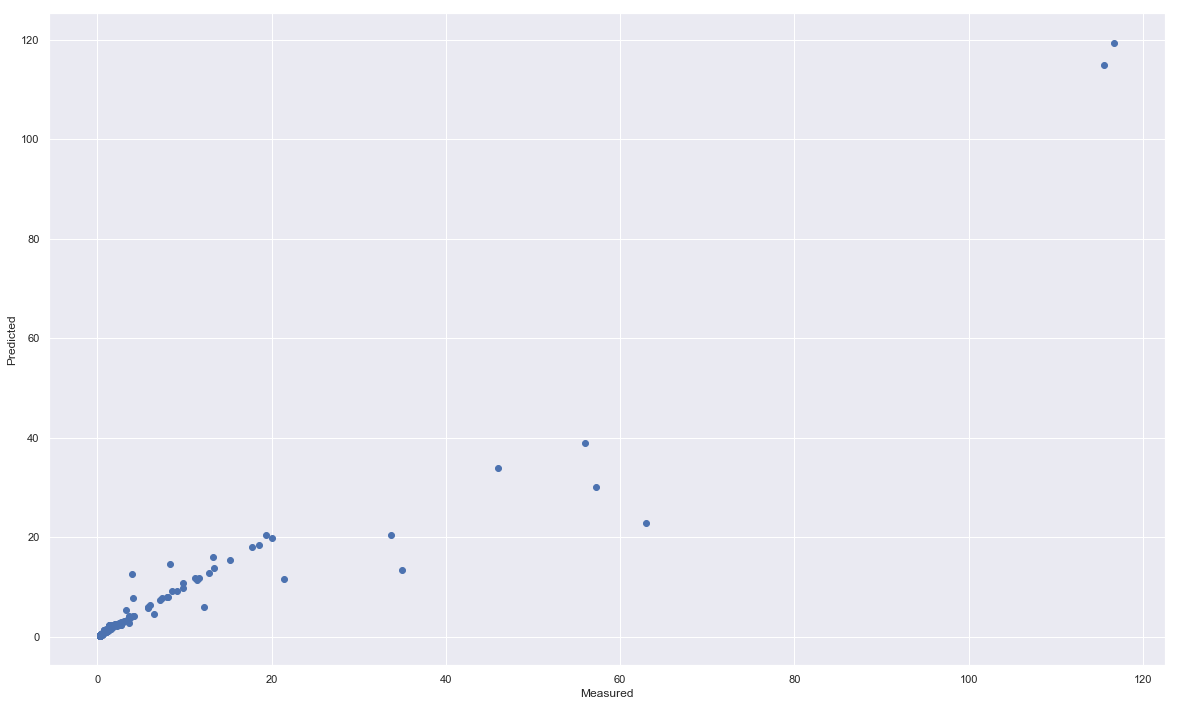

In [73]:
C = [0.1, 0.5, 1, 5, 10, 50]
param_grid = [
     {'C': C, 'kernel': ['linear']},
     {'C': C, 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
     {'degree': [2,3,4], 'kernel': ['poly']},
     {'coef0': [0.0], 'kernel': ['sigmoid']} 
]
model = SVR()
svm_reg = GridSearchCV(model, param_grid, cv = 5)

svm_reg.fit(X_train_reduced, y_train)

print("Best parameters set found :", svm_reg.best_params_)
print('Train score',svm_reg.score(X_train_reduced,y_train))
print('Test score',svm_reg.score(X_test_reduced,y_test))

y_pred = svm_reg.best_estimator_.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

### Comparing Regression Models with and without PCA
As we can see PCA doesn't necessarily help in getting better results, compared to the manual feature selection we performed. But the scores of with and without PCA are comparable, indicating PCA does a good job in eleminating highly correlated features. Since manual feature selection is not possible for large datasets, PCA provides a viable alternate

We also notice, that using PCA helps to significantly improve the train score for the KNN regression model.

Finally, Polynomial Regression with degree 2 fits the data the best, and results in the highest test and train score.

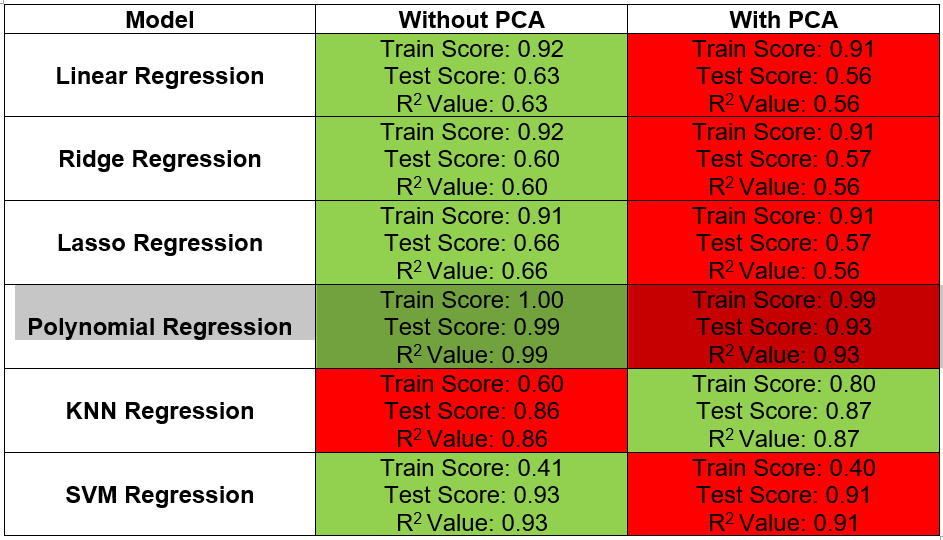

### Deep Learning Model

In [74]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [75]:
X_train.shape

(582, 19)

### Input layer
We use the sigmoid activation function since it is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range and it won’t blow up the activations then.

### Output layer
ReLu is nonlinear in nature,and combinations of ReLu are also non linear. ReLu also allows for sparse and efficient activations

In [76]:
#step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(32, input_dim = 19, activation = 'sigmoid'))

#output layer
model1.add(Dense(1, activation = 'relu'))

#step 2: compile the model
model1.compile(loss = 'mse', optimizer = 'sgd', metrics = ['acc'])

#step 3: train the model
model1.fit(X_train,y_train, epochs = 20, batch_size = 256)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
582/582 [==============================] - 0s 179us/sample - loss: 1956.2253 - acc: 0.0000e+00
Epoch 2/20
582/582 [==============================] - 0s 7us/sample - loss: 1900.8982 - acc: 0.0000e+00
Epoch 3/20
582/582 [==============================] - 0s 7us/sample - loss: 1843.2341 - acc: 0.0000e+00
Epoch 4/20
582/582 [==============================] - 0s 5us/sample - loss: 1814.4072 - acc: 0.0000e+00
Epoch 5/20
582/582 [==============================] - 0s 5us/sample - loss: 1791.2378 - acc: 0.0000e+00
Epoch 6/20
582/582 [==============================] - 0s 5us/sample - loss: 1776.3511 - acc: 0.0000e+00
Epoch 7/20
582/582 [==============================] - 0s 7us/sample - loss: 1760.1619 - acc: 0.0000e+00
Epoch 8/20
582/582 [==============================] - 0s 7us/sample - loss: 1746.6358 - acc: 0.0000e+0

In [77]:
#model evaluation

model1.evaluate(X_train, y_train)

582/582 [==============================] - 0s 75us/sample - loss: 1544.0968 - acc: 0.0000e+00


[1544.0968369946038, 0.0]

In [78]:
model1.evaluate(X_test, y_test)


194/194 [==============================] - 0s 31us/sample - loss: 54.4202 - acc: 0.0000e+00


[54.42023639396294, 0.0]

In [80]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_train)
print("R2 value: %.2f" % r2_score(y_test, model1.predict(X_test)))


R2 value: 0.74


Thus the model is able to account for 74% of the variation